### Libraries

In [382]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import DateTime as dtm
import warnings


### Import Data

In [383]:
df = pd.read_csv("data/clean_sharks_export.csv")

In [384]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [385]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [386]:
df_BR = df.loc[df['Country'] == 'Brazil']

In [387]:
df_BR['Year']

6       2018.0
27      2018.0
31      2018.0
44      2018.0
51      2018.0
         ...  
5121    1927.0
5745    1887.0
5776    1884.0
5847    1878.0
6099    1826.0
Name: Year, Length: 112, dtype: float64

In [388]:
# Count Yearly Occurences 
df_BR['Year_counts'] = df_BR['Year'].apply(lambda x: (df_BR['Year'] == x).sum())

In [389]:
df_BR['Year_counts']

6       5
27      5
31      5
44      5
51      5
       ..
5121    1
5745    1
5776    1
5847    1
6099    1
Name: Year_counts, Length: 112, dtype: int64

In [390]:
df['Year'] = pd.to_datetime(df['Year'])

In [391]:
df_BR["Year_counts"].median()

4.5

In [392]:
#defined angryness factor to be 20% above baseline (median)
criteria = df_BR["Year_counts"].median() * 1.20
criteria

5.3999999999999995

In [393]:
#Extracting data from 1950 onwards for better visualization 
df_BR = df_BR[df_BR['Year'] > 1950]

In [394]:
#finding median & average values to create baseline
df_BR["Year_counts"].median()

5.0

In [395]:
df_BR["Year_counts"].mean()

4.96

## <span style="color:darkslategrey">Q: How angry did _Brazilian_ sharks get after the infamous 7 X 1? </span>


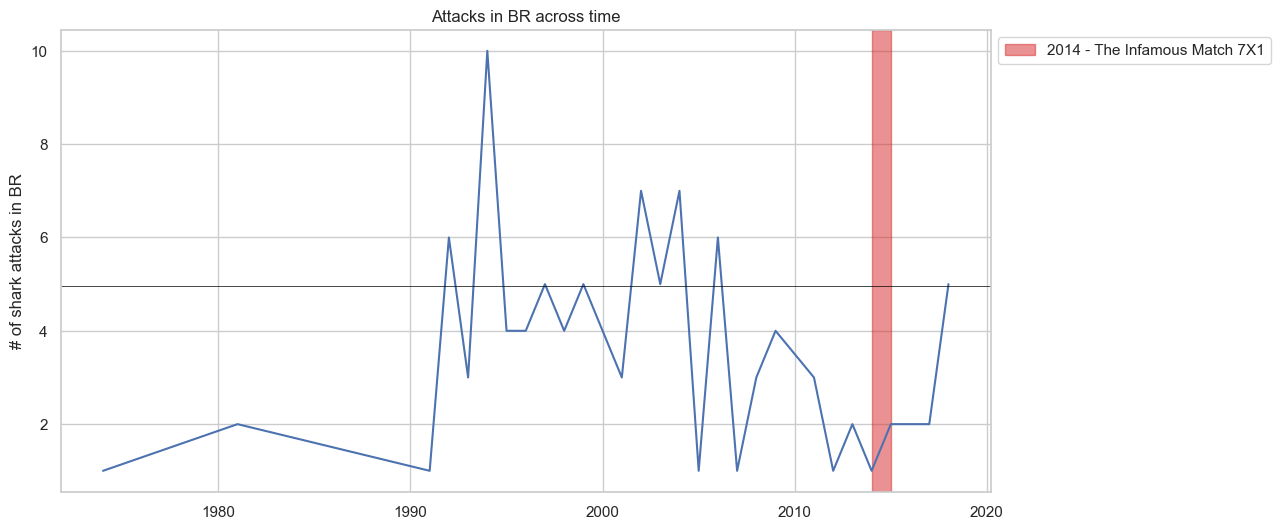

<Figure size 1200x600 with 0 Axes>

In [401]:
plt.plot(df_BR['Year'], df_BR["Year_counts"])


#adjust labels and title
plt.ylabel('# of shark attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.legend(bbox_to_anchor=(1, 1))


#Identify treshhold (median) to check for success criteria
plt.axhline(y=4.96, xmin=0, xmax=2022, c='black', linewidth=0.5)

#export graph to images folder
fig = plt.figure()
fig.savefig('images/Shark-attacks_BR_WC-2014.png', dpi=200, bbox_inches='tight')

In [ ]:

#sns.lineplot(data=df_BR, x='Year', y='Year_counts')

plt.plot(df_BR['Year'], df_BR["Year_counts"], color='tab:blue')



#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2002,2003, color='tab:green', alpha=0.5, label="2002 - Pentacampeão!")
plt.axvspan(2006,2007, color='tab:blue', alpha=0.5, label="2006 - 1/4 Finals")
plt.axvspan(2010,2011, color='tab:blue', alpha=0.5, label="2010 - 1/4 Finals")
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.axvspan(2018,2019, color='tab:blue', alpha=0.5, label="2018 - 1/4 Finals")


plt.legend(bbox_to_anchor=(1, 1))
#Identify treshhold (median) to check for success criteria
plt.axhline(y=5, xmin=0, xmax=2022, c='black', linewidth=0.5)



### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that _Brazilian_ sharks do not react negatively when Brazil loses in the World Cup at all, with numbers during those periods being in an all time low. 

In fact, the overall rise of the 'angryness factor' on the years leading to the World Cud could indicate that _Brazilian_ _sharks_ are are generally against the Bread and Circus politics surrounding the sport. Qualitative data (e.g. interview with the sharks), is needed for further analysis on that subject. 


## <span style="color:darkslategrey"> Q: How angry were the _Brazilian_ sharks that did attack? </span>




In [ ]:
df_BR2 = df_BR.loc[(df_BR['Year'] == 2002) | (df_BR['Year'] == 2006) | (df_BR['Year'] == 2010) | (df_BR['Year'] == 2014) | (df_BR['Year'] == 2018) & (df_BR['Type'] != "Invalid"), ['Type','Year', "Fatal"]]

df_BR2['Type'].dropna(inplace=True)

In [ ]:
df_BR2.groupby(['Type', 'Year', 'Fatal'])['Fatal'].count().unstack().plot(kind='bar', title="Number of fatal attacks during World Cups", color=['tab:cyan', 'tab:red'], alpha=0.8)

#df_BR2.groupby(['Year'])['Fatal', 'Type'].count().unstack().plot(kind='bar', color=['yellow', 'red'])

legend_labels = ["The usual bar fight", 'Angry to death']

plt.legend(labels=legend_labels)
plt.xticks(rotation=0.5)
plt.ylabel("Total Attacks")
plt.xlabel("Type of Attack, Year")
# place a text box in upper left in axes coords
plt.text(2.7, 3.5, '*No provoked attacks registered',fontsize=9)


### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that most fatal attacks happened when Brazil won the worldcup which is leading this researcher to believe that perhaps this is actually how sharks celebrate the world cup. Further research is required to understand sharks customs regarding sports. 






## <span style="color:darkslategrey"> Q: What was the "Angryness Factor" sharks from countries that made it to the finals? </span>

In [ ]:
# Create figure and axes [row,column]

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,15))

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
country_ = ['France', 'Croatia', 'Germany', 'Argentina', 'Spain', 'Netherlands', 'Italy', 'France', 'Brazil', 'Germany']
years_ = [2018, 2014, 2010, 2016, 2002]

In [ ]:
df_global = df[df['Country'].isin(country_)]
df_global['Country'].value_counts()

In [ ]:
#df_global.Year = pd.to_datetime(df_global.Year).dt.year
#df_global.Year



In [ ]:
df_global.head()

In [ ]:
# for each empty plot make one graph to represent a WC Finalist country.

#1. France
sns.countplot(x=df['Year'], hue=df['Country'])


#2. 

In [ ]:
#df_BR2 = df_BR.loc[(df_BR['Year'] == 2002) | (df_BR['Year'] == 2006) | (df_BR['Year'] == 2010) | (df_BR['Year'] == 2014) | (df_BR['Year'] == 2018) & (df_BR['Type'] != "Invalid"), ['Type','Year', "Fatal"]]


In [ ]:
plt.plot(df_BR['Year'], df_BR["Year_counts"])


#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.legend(bbox_to_anchor=(1, 1))
#Identify treshhold (median) to check for success criteria
plt.axhline(y=4.96, xmin=0, xmax=2022, c='black', linewidth=0.5)

In [ ]:
#df_index = df[["Country", "Year"]].groupby(by=["Country", "Year"]).agg({'Year':'sum'})

#df_index = pd.crosstab(df["Year"], df["Country"]) # count
#pivot_df = pd.crosstab(df.Year,df.Country,values=df.Value,aggfunc='sum')

In [ ]:
#df['Country'].value_counts()

In [ ]:
df['Year'] = pd.to_datetime(df['Year'])
df.Year = pd.to_datetime(df.Year).dt.year
df.head()

In [ ]:
pivot_df.head()

In [ ]:
# use crosstab to pivot the dataframe
pivot_df = pd.crosstab(df.Year, df.Country)

# Plot the data for a specific country
plt.plot(pivot_df.index, pivot_df)

# Add labels and title
#plt.xlabel('Year')
#plt.ylabel('Occurrences')
#plt.title('Occurrences by Year for Germany')

# Show the plot
#plt.show()



In [ ]:
df_index.sample(5)